#### INFO 634: Final Project 

**Instructions / READ.me:** 

**Introduction** : The following project report explains the process of data acquisition, EDA and evaluation of Covid-19 data , both on a world level and in the united states. The aim of the project is to study the impact of vaccination against covid 19 by analyzing the cases in the world and in the USA, where early vaccination rollout plan was implemented. 

---



In [ ]:
import math; import matplotlib.pyplot as plt; from matplotlib import animation, rc
import numpy as np; from numpy import linalg ; import pandas as pd; 
import seaborn as sns; import folium; from folium.plugins import MarkerCluster; 
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest; 
from scipy.stats import norm

# For Time Series
#import pandas as pd; import matplotlib.pyplot as plt; import seaborn as sns; import numpy as np
import warnings 

from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline
warnings.filterwarnings('ignore')

# 1. Covid Cases Data Mining

#### 1.	Acquisition of data and data cleaning. 

The following data has been acquired from John hopkins university's Github repository where data is uploaded on daily basis. 
The link to the Github Repository is : https://github.com/CSSEGISandData/COVID-19


---



In [ ]:
#importing and original look Global level

#data = pd.read_csv('/Users/evanfalkowski/Documents/Drexel/Spring_21/INFO_634/FinalProject/05-18-2021.csv')
data = pd.read_csv('./data/05-18-2021.csv')
data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-05-19 04:20:42,33.93911,67.709953,63819,2751,55118.0,5950.0,Afghanistan,163.939686,4.310628
1,NaN,NaN,NaN,Albania,2021-05-19 04:20:42,41.15330,20.168300,132071,2436,126405.0,3230.0,Albania,4589.304330,1.844462
2,NaN,NaN,NaN,Algeria,2021-05-19 04:20:42,28.03390,1.659600,125693,3388,87609.0,34696.0,Algeria,286.636284,2.695456
3,NaN,NaN,NaN,Andorra,2021-05-19 04:20:42,42.50630,1.521800,13569,127,13234.0,208.0,Andorra,17561.638517,0.935957
4,NaN,NaN,NaN,Angola,2021-05-19 04:20:42,-11.20270,17.873900,31045,685,26013.0,4347.0,Angola,94.458549,2.206474


In [ ]:
# describes per col, NaNs, & number of uniques
for i in data.columns:
    print(i,': NaN: ', data[i].isna().sum(),' unique: ',len(data[i].unique()))
    print(data[i].describe(),'\n\n')

FIPS : NaN:  717  unique:  3267
count     3266.000000
mean     32401.272811
std      18033.806874
min         66.000000
25%      19049.500000
50%      30068.000000
75%      47040.500000
max      99999.000000
Name: FIPS, dtype: float64 


Admin2 : NaN:  712  unique:  1927
count           3271
unique          1926
top       Unassigned
freq              51
Name: Admin2, dtype: object 


Province_State : NaN:  171  unique:  577
count      3812
unique      576
top       Texas
freq        255
Name: Province_State, dtype: object 


Country_Region : NaN:  0  unique:  192
count     3983
unique     192
top         US
freq      3277
Name: Country_Region, dtype: object 


Last_Update : NaN:  0  unique:  6
count                    3983
unique                      6
top       2021-05-19 04:20:42
freq                     3973
Name: Last_Update, dtype: object 


Lat : NaN:  88  unique:  3895
count    3895.000000
mean       35.985508
std        13.024749
min       -52.368000
25%        33.269320
50%   

In [ ]:
#reduce or could fill NaN in 

data2 = data.drop(['FIPS','Admin2','Last_Update'], axis=1); data2 = data2.dropna()
print('Original: ',data.shape, 'Now :',data2.shape); data2.head()

## fill in NaN method # Not adjusted for this set

#median = np.median(yelp_data["liking"][~yelp_data["liking"].isna()]) #exclude missing to get median
#yelp_data["liking"].fillna(median, inplace=True) ## Replace missing values with median  

Original:  (3983, 14) Now : (519, 11)


,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
8,Australian Capital Territory,Australia,-35.4735,149.0124,124,3,121.0,0.0,"Australian Capital Territory, Australia",28.965195,2.419355
9,New South Wales,Australia,-33.8688,151.2093,5565,54,0.0,5511.0,"New South Wales, Australia",68.551367,0.970350
10,Northern Territory,Australia,-12.4634,130.8456,170,0,165.0,5.0,"Northern Territory, Australia",69.218241,0.000000
11,Queensland,Australia,-27.4698,153.0251,1592,7,1565.0,20.0,"Queensland, Australia",31.121103,0.439698
12,South Australia,Australia,-34.9285,138.6007,746,4,733.0,9.0,"South Australia, Australia",42.470823,0.536193


**EDA** exploratory data analysis 


In [ ]:
data_grouped = data2.groupby(["Country_Region","Province_State"]).sum()
data_grouped.head()

Lat     Long_  Confirmed  \
Country_Region Province_State                                               
Australia      Australian Capital Territory -35.4735  149.0124        124   
               New South Wales              -33.8688  151.2093       5565   
               Northern Territory           -12.4634  130.8456        170   
               Queensland                   -27.4698  153.0251       1592   
               South Australia              -34.9285  138.6007        746   

                                             Deaths  Recovered  Active  \
Country_Region Province_State                                            
Australia      Australian Capital Territory       3      121.0     0.0   
               New South Wales                   54        0.0  5511.0   
               Northern Territory                 0      165.0     5.0   
               Queensland                         7     1565.0    20.0   
               South Australia                    4      733.0     9.0   

                                             Incident_Rate  \
Country_Region Province_State                                
Australia      Australian Capital Territory      28.965195   
               New South Wales                   68.551367   
               Northern Territory                69.218241   
               Queensland                        31.121103   
               South Australia                   42.470823   

                                             Case_Fatality_Ratio  
Country_Region Province_State                                     
Australia      Australian Capital Territory             2.419355  
               New South Wales                          0.970350  
               Northern Territory                       0.000000  
               Queensland                               0.439698  
               South Australia                          0.536193

Province_State
England           112315
Sao Paulo         105105
Maharashtra        83777
Rio de Janeiro     48313
Minas Gerais       37617
Name: Deaths, dtype: int64


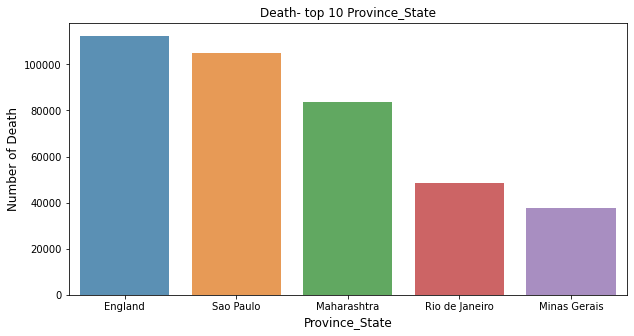

In [ ]:
Province = data2.groupby("Province_State")
top_prov = Province["Deaths"].sum().sort_values(ascending=False)[:5]; print(top_prov)

plt.figure(figsize=(10,5)); sns.barplot(x=top_prov.index,y=top_prov.values, alpha=0.8)
plt.title('Death- top 10 Province_State')
plt.ylabel('Number of Death', fontsize=12)
plt.xlabel('Province_State', fontsize=12)
plt.show()

### Generating Country wise reports

Country_Region
Brazil            439050
India             283248
Mexico            220746
United Kingdom    127953
Italy             124497
Russia            114619
Germany            86671
Colombia           82291
Spain              79502
Peru               66471
Name: Deaths, dtype: int64


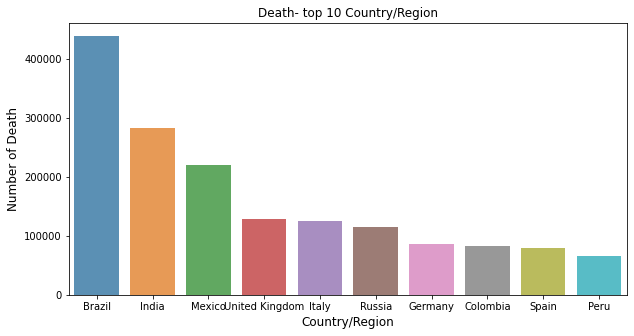

In [ ]:
Country = data2.groupby("Country_Region")
top_country = Country["Deaths"].sum().sort_values(ascending=False)[:10]; print(top_country)

plt.figure(figsize=(10,5))
sns.barplot(x=top_country.index,y=top_country.values, alpha=0.8)
plt.title('Death- top 10 Country/Region')
plt.ylabel('Number of Death', fontsize=12)
plt.xlabel('Country/Region', fontsize=12)
plt.show()

In [ ]:
data_rounded = np.round(data2,decimals=3)
world_map= folium.Map(); marker_cluster = MarkerCluster().add_to(world_map)
for i in range(len(data2)):
        Lat = data_rounded.iloc[i]['Lat']
        Long = data_rounded.iloc[i]['Long_']
        radius=6
        popup_text = """Country_Region : {}<br>
                    Confirmed : {}<br>
                    Deaths : {} <br>
                    Recovered : {} <br>
                    Active : {} <br>
                    Incident_Rate : {} <br>
                    Case_Fatality_Ratio : {} <br>"""
        popup_text = popup_text.format(data_rounded.iloc[i]['Country_Region'],
                                data_rounded.iloc[i]['Confirmed'],
                                data_rounded.iloc[i]['Deaths'],
                                data_rounded.iloc[i]['Recovered'],
                                data_rounded.iloc[i]['Active'],
                                data_rounded.iloc[i]['Incident_Rate'],
                                data_rounded.iloc[i]['Case_Fatality_Ratio'])
        folium.CircleMarker(location = [Lat, Long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
world_map

In [ ]:
# Not to much change in dropping them, but could replace or could convert vals
# could also do box plot

## 2.	Outlier Detection

##### IQR

In [ ]:
positions = ['Confirmed','Deaths','Recovered','Active','Incident_Rate','Case_Fatality_Ratio']
outlier_data = data2[positions]; outlier_data.head()

# could also break down per country or state/province and then perform outliers
# but here we look at a global perspective

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
8,124,3,121.0,0.0,28.965195,2.419355
9,5565,54,0.0,5511.0,68.551367,0.970350
10,170,0,165.0,5.0,69.218241,0.000000
11,1592,7,1565.0,20.0,31.121103,0.439698
12,746,4,733.0,9.0,42.470823,0.536193


In [ ]:
## IQR + upper/lower limits

for i in outlier_data.columns:
    Q1 = outlier_data[i].quantile(0.25)
    Q3 = outlier_data[i].quantile(0.75)
    IQR = Q3 - Q1; upper = Q3 + 1.5*IQR; lower = Q1 - 1.5*IQR
    outliers = outlier_data[i][(outlier_data[i]>upper)|(outlier_data[i]<lower)]
    above = outlier_data[i][(outlier_data[i]>upper)]
    below = outlier_data[i][(outlier_data[i]<lower)]
    
    print(i);print(f'IQR : {IQR}')
    print(f"Upper Limit : {upper}"); print(f"Lower Limit : {lower}")
    print(f"Number of Outliers : {outliers.shape[0]}")
    print(f"Number of Outliers Above : {above.shape[0]}")
    print(f"Number of Outliers Below: {below.shape[0]}", '\n')

Confirmed
IQR : 89010.5
Upper Limit : 234283.75
Lower Limit : -121758.25
Number of Outliers : 79
Number of Outliers Above : 79
Number of Outliers Below: 0 

Deaths
IQR : 2843.0
Upper Limit : 7224.0
Lower Limit : -4148.0
Number of Outliers : 61
Number of Outliers Above : 61
Number of Outliers Below: 0 

Recovered
IQR : 61830.0
Upper Limit : 154808.5
Lower Limit : -92511.5
Number of Outliers : 72
Number of Outliers Above : 72
Number of Outliers Below: 0 

Active
IQR : 28372.0
Upper Limit : 71444.0
Lower Limit : -42044.0
Number of Outliers : 64
Number of Outliers Above : 64
Number of Outliers Below: 0 

Incident_Rate
IQR : 5577.616389330004
Upper Limit : 15050.963918593283
Lower Limit : -7259.5016387267315
Number of Outliers : 2
Number of Outliers Above : 2
Number of Outliers Below: 0 

Case_Fatality_Ratio
IQR : 1.7445015588129862
Upper Limit : 5.489809218083099
Lower Limit : -1.4881970171688454
Number of Outliers : 37
Number of Outliers Above : 37
Number of Outliers Below: 0 



In [ ]:
'''for i in Country.columns:
    Q1 = Country[i].quantile(0.25)
    Q3 = Country[i].quantile(0.75)
    IQR = Q3 - Q1; upper = Q3 + 1.5*IQR; lower = Q1 - 1.5*IQR
    outliers = Country[i][(Country[i]>upper)|(Country[i]<lower)]
    above = Country[i][(Country[i]>upper)]
    below = Country[i][(Country[i]<lower)]
    
    print(i);print(f'IQR : {IQR}')
    print(f"Upper Limit : {upper}"); print(f"Lower Limit : {lower}")
    print(f"Number of Outliers : {outliers.shape[0]}")
    print(f"Number of Outliers Above : {above.shape[0]}")
    print(f"Number of Outliers Below: {below.shape[0]}", '\n')'''

AttributeError: 'DataFrameGroupBy' object has no attribute 'columns'

##### normal plot :  some variable in India

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Deaths', ylabel='Density'>

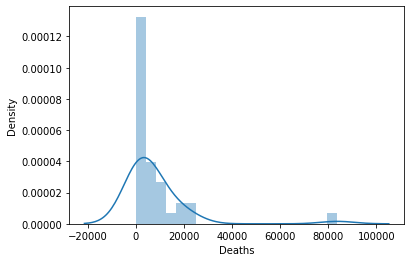

In [ ]:
india = data2[(data2['Country_Region'] == 'India')]; #india.head()
sns.distplot(india['Deaths'], bins=20)


In [ ]:

mu, std = norm.fit(india['Deaths']); print(mu, std)
normal_india = norm(mu,std)

p = normal_india.cdf(1000)
print("{:.3f}".format(p))

7868.0 14360.620309257767
0.316


# 2. Time Series Analysis of Confirmed Cases in US

Following the analysis for global COvid-19 data, we will be looking at time series analysis for Covid-19. 

# Data Preperation

In [ ]:
# Load the csv file from disk
confirmed_data = pd.read_csv(
    filepath_or_buffer = "./data/time_series_covid19_confirmed_US.csv", sep = ",", header = 0, index_col = [0])

In [ ]:
# Display loaded data
confirmed_data.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,7126,7135,7141,7142,7142,7142,7142,7150,7161,7172
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,21578,21593,21606,21620,21620,21620,21620,21661,21674,21684
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,2331,2331,2333,2334,2334,2334,2334,2337,2340,2343
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,2660,2662,2666,2664,2664,2664,2664,2665,2665,2665
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,6847,6856,6862,6864,6864,6864,6864,6887,6889,6894


From 1/22/2020 to 6/3/2021, total 498 days.

In [ ]:
# Sum total confirmed cases by date
confirmed_data = confirmed_data.sum(axis=0)

In [ ]:
# Remove unuseful data
confirmed_data = confirmed_data.iloc[9:]

In [ ]:
# Convert series object to dataframe
confirmed_data = pd.DataFrame(confirmed_data, columns = ['CONFIRMED'])

In [ ]:
# Display processed data, show last 5
confirmed_data.tail()

,CONFIRMED
5/30/21,33261731
5/31/21,33267507
6/1/21,33290450
6/2/21,33307363
6/3/21,33326437


In [ ]:
# Convert string to datetime objects
confirmed_data.index = pd.to_datetime(confirmed_data.index)

In [ ]:
# Check data type
confirmed_data.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01',
               '2021-06-02', '2021-06-03'],
              dtype='datetime64[ns]', length=499, freq=None)

# Data Visualization

In [ ]:
# Create time series
series = pd.Series(confirmed_data.unstack().values, index = confirmed_data.index)

## Line Plot

<AxesSubplot:>

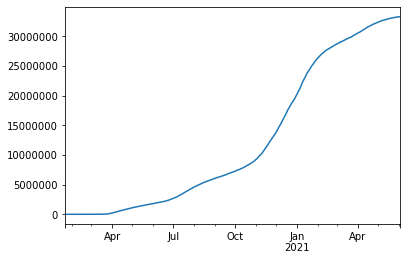

In [ ]:
# Display line plot
plt.ticklabel_format(style = 'plain', useOffset = False)
series.plot()

According to the plot, there is an obvious trend based on the time series. Therefore we can say the dataset is trend stationary.

## Histogram Plot

<AxesSubplot:>

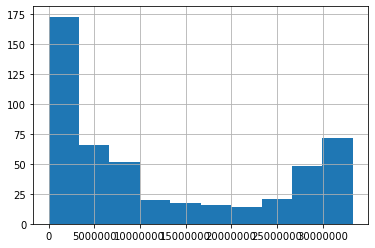

In [ ]:
# Display histogram plot
plt.ticklabel_format(style = 'plain', useOffset = False)
series.hist()

We use histogram plot to observe the distribution of the data. From observation, most of days(close to 175 days) have less than 500k confirmed cases.

## Lag Plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

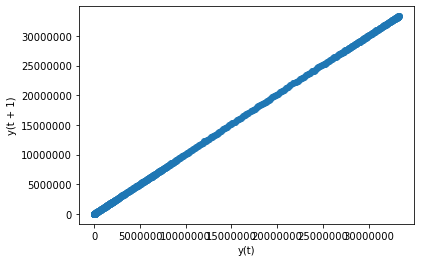

In [ ]:
# Display scatter lag plot
plt.ticklabel_format(style = 'plain', useOffset = False)
lag_plot(series)

Lag features are the procedure that transform time series forecasting problems to supervised learning problems. By using a simple approach which predict the value at the (t+1) with the value at (t). It has value pairs: Value(t), Value(t+1).\
"If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.\
If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.\
Either relationship is good as they can be modeled."(1)\
From this plot, we say it is this data can be modeled.

## Outlier and Interval Detection

In [ ]:
# Group data by frequency conversion to plot boxplot in order to detect outliers
years, index = [], []
for name, group in series.groupby(pd.Grouper(freq = "A")):
    years.append(group.values)
    index.append(name.year)
df = pd.DataFrame(years, index = index, columns = range(1,346))

### Boxplot

<AxesSubplot:>

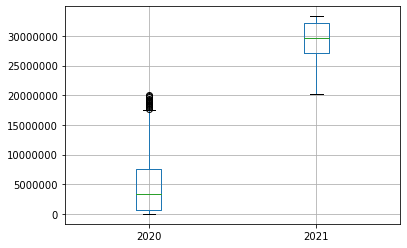

In [ ]:
# Display boxplot
plt.ticklabel_format(style = 'plain', useOffset = False)
df.head(10).T.boxplot()

### Heatmap Plot

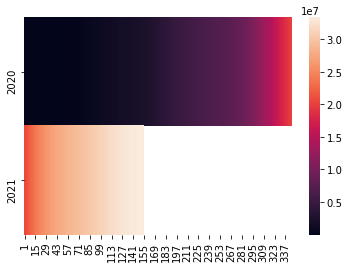

In [ ]:
# Display heatmap
sns.heatmap(df);

We use boxplot and heatmap to observe any intervals or outliers in data. From plot results, there are outliers and intervals in 2020. We decided to keep them to maintain data integrity. The reason behind this decision is we think they are real and accurate confirmed cases data. Unlike abnormal data caused by instrument failure or human mistake, these outliers may helpful for our time series analysis and modeling.

# Prediction and Model evaluation

## Persistence Model

In [ ]:
# Split train and test data
X = series.values
train_size = int(len(X) * 0.9)
train, test = X[0:train_size], X[train_size:len(X)]

In [ ]:
# Show size of all, training and testing data
print('All: %d' % (len(X)))
print('Training: %d' % (len(train)))
print('Testing: %d' % (len(test)))

All: 499
Training: 449
Testing: 50


### Train and Test Data Line Plot

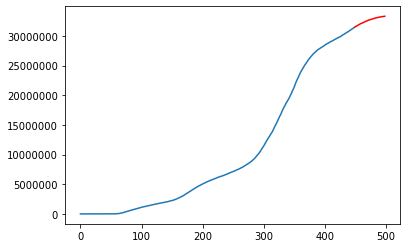

In [ ]:
# Plot all, training and testing data
plt.plot(train)
plt.ticklabel_format(style = 'plain', useOffset = False)
plt.plot([None for i in train] + [x for x in test], color = 'r')

In [ ]:
# Predict the value at the next time (t+1) using the given value at the current time (t)
values = pd.DataFrame(series.values)
df = pd.concat([values.shift(1), values], axis = 1)
df.columns = ['t', 't+1']

In [ ]:
# Split x and y of train and test
X = df.values
train_size = int(len(X) * 0.9)
train, test = X[1:train_size], X[train_size:]

train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [ ]:
# Define persistence model
def model_persistence(x):
    return x

In [ ]:
# Calculate root-mean-square deviation
predictions = []
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = np.sqrt(mean_squared_error(test_y, predictions))

In [ ]:
# Show root-mean-square deviation
print('Test RMSE: %.3f' % rmse)

Test RMSE: 42008.985


### Exepection and Prediction Result Line Plot

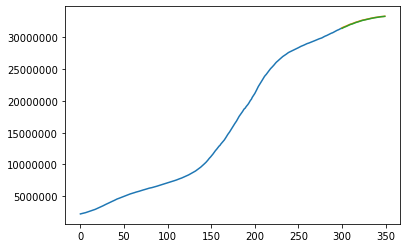

In [ ]:
# Display expected line and prediction line in one line plot
plt.plot(train_y[-300:])
plt.ticklabel_format(style = 'plain', useOffset = False)
plt.plot([None for i in train_y[-300:]] + [x for x in test_y])
plt.plot([None for i in train_y[-300:]] + [x for x in predictions])

The prediction and actual confirmed cases are very close. This is the advantage of the persistence model: as long as the data trend is stationary, it can quickly create a baseline for forecasting. 

### Persistence Model Residual Forecast Errors Visualization

In [ ]:
# Calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)

### Residuals Line Plot

<AxesSubplot:>

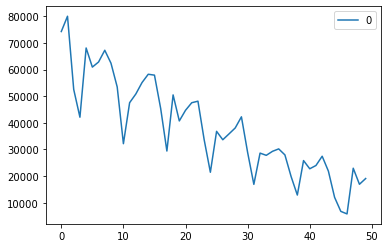

In [ ]:
# Display residuals
residuals.plot()

In [ ]:
# Describe residuals
residuals.describe()

,0
count,50.000000
mean,38033.360000
std,18019.784148
min,5776.000000
25%,24433.750000
50%,34757.500000
75%,50753.750000
max,80051.000000


###  Residuals Histograms Plot

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

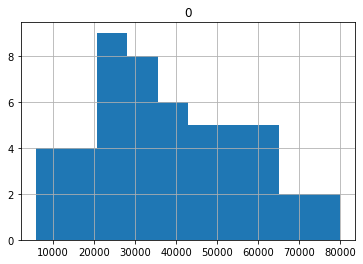

In [ ]:
# Histograms plot
residuals.hist()

###  Residuals Q-Q Plot

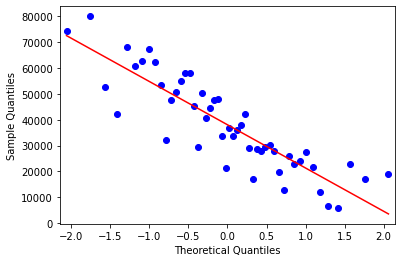

In [ ]:
# Q-Q plot
qqplot(residuals, line = 'r')
plt.show()

###  Residuals Density Plot

<AxesSubplot:ylabel='Density'>

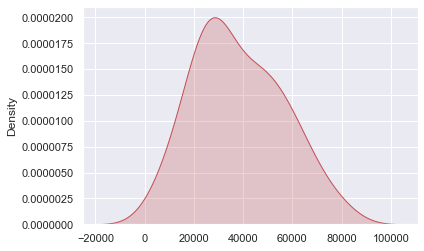

In [ ]:
# Density plot
sns.set(color_codes = True)
plt.ticklabel_format(style = 'plain', useOffset = False)
sns.kdeplot(np.hstack(residuals.values), shade = True, color = "r")

We use Q-Q plot and density plot to observe the distribution and check the normality of the distribution of residual errors. From this two plots, the residuals are not normally distributed comparing to idealized Gaussian distribution.

## Autoregression Model

In [ ]:
# Split dataset
X = series.values
train_size = int(len(X) * 0.9)
train, test = X[1:train_size], X[train_size:]

In [ ]:
# Train autoregression
model = AutoReg(train, 1, old_names = False)
model_fit = model.fit()

In [ ]:
# Display model summary
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  448
Model:                     AutoReg(1)   Log Likelihood               -5521.131
Method:               Conditional MLE   S.D. of innovations          55970.832
Date:                Fri, 04 Jun 2021   AIC                             21.879
Time:                        16:19:17   BIC                             21.906
Sample:                             1   HQIC                            21.889
                                  448                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.526e+04   3677.081      9.590      0.000    2.81e+04    4.25e+04
y.L1           1.0034      0.000   4004.230      0.000       1.003       1.004
                                    Roots           

In [ ]:
# Make predictions
predictions = model_fit.predict(start = len(train), end = len(train) + len(test) - 1, dynamic = False)

In [ ]:
# Calculate root-mean-square deviation
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3184272.787


### Exepection and Prediction Result Line Plot

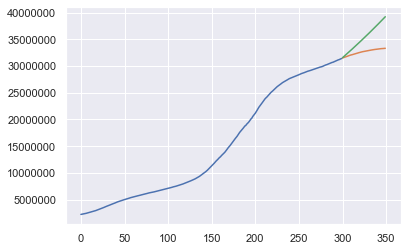

In [ ]:
# Plot predictions and expected results on the test data
plt.plot(train_y[-300:])
plt.ticklabel_format(style = 'plain', useOffset = False)
plt.plot([None for i in train_y[-300:]] + [x for x in test_y])
plt.plot([None for i in train_y[-300:]] + [x for x in predictions])

The prediction from the autoregression model has a significant difference with actual data. We think the existence of outliers may result in this observation, since the autoregression model makes predictions by using the correlation, which is the relationship between current and previous time steps.

### Autoregression Model Residual Forecast Errors Visualization

In [ ]:
# Calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)

### Residuals Line Plot

<AxesSubplot:>

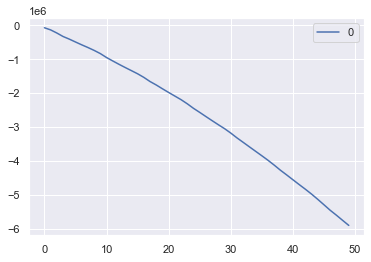

In [ ]:
# Display residuals
residuals.plot()

In [ ]:
# Describe residuals
residuals.describe()

,0
count,5.000000e+01
mean,-2.672742e+06
std,1.748481e+06
min,-5.906534e+06
25%,-4.090899e+06
50%,-2.508808e+06
75%,-1.171987e+06
max,-6.908026e+04


###  Residuals Histograms Plot

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

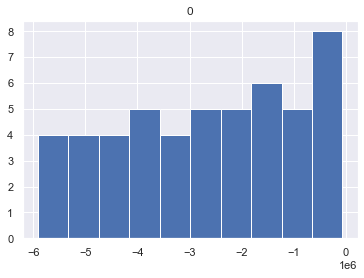

In [ ]:
# Histograms plot
residuals.hist()

###  Residuals Q-Q Plot

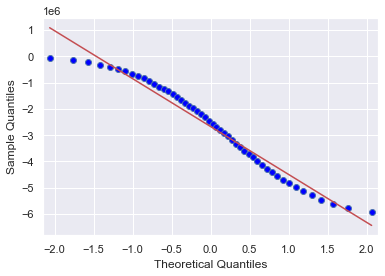

In [ ]:
# Q-Q plot
qqplot(residuals, line='r')
plt.show()

###  Residuals Density Plot

<AxesSubplot:ylabel='Density'>

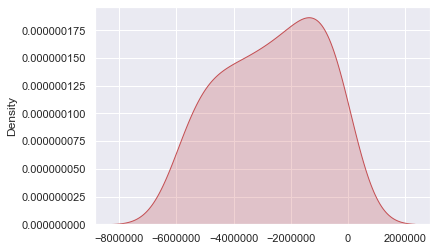

In [ ]:
# Density plot
sns.set(color_codes = True)
plt.ticklabel_format(style = 'plain', useOffset = False)
sns.kdeplot(np.hstack(residuals.values), shade = True, color = "r")

The residuals are not normally distributed comparing to idealized Gaussian distribution.

## ARIMA Model

In [ ]:
# Split dataset
X = series.values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

The ARIMA Model is an Autoregressive Integrated Moving Average Model. It is a class of statistical models for time series data analysis and forecasts. AR is Autoregression. I is Integrated, using differencing of raw observations to make time series stationary. MA is Moving Average, using observation and residual errors dependency in a moving average model, and applies to lagged observations(1).

In [ ]:
# Train ARIMA model
for t in range(len(test)):
    model = ARIMA(history, order = (5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast()
    yhat = forecast[0]
    predictions.append(yhat)
    res = test[t]
    history.append(res)

In [ ]:
# Display model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  498
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5503.604
Date:                Fri, 04 Jun 2021   AIC                          11019.207
Time:                        16:19:21   BIC                          11044.459
Sample:                             0   HQIC                         11029.119
                                - 498                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5067      0.019     27.062      0.000       0.470       0.543
ar.L2          0.1872      0.025      7.403      0.000       0.138       0.237
ar.L3          0.0973      0.030      3.207      0.0

In [ ]:
# Calculate root-mean-square deviation
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 9775.103


### Exepection and Prediction Result Line Plot

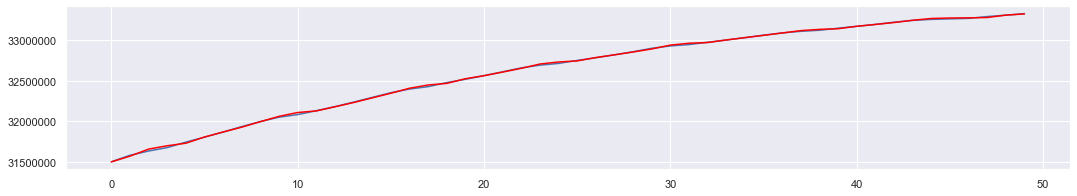

In [ ]:
# Plot predictions and expected results on the test data
plt.rc('figure', figsize = (18, 3))
plt.plot(test)
plt.ticklabel_format(style = 'plain', useOffset = False)
plt.plot(predictions, color = 'red')

The prediction and actual confirmed cases are very close. By using multiple statistical model classes, the ARIMA has better performance than using the AR model alone.

### ARIMA Model Residual Forecast Errors Visualization

In [ ]:
# Calculate residuals
residuals = pd.DataFrame(model_fit.resid)

### Residuals Line Plot

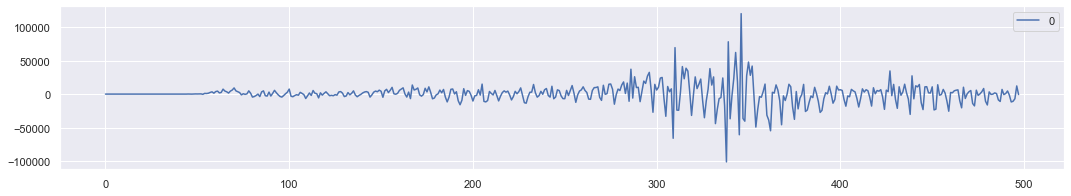

In [ ]:
# Display residuals
residuals.plot()
plt.show()

In [ ]:
# Describe residuals
residuals.describe()

,0
count,498.000000
mean,503.079198
std,15580.208809
min,-101006.067223
25%,-3448.123944
50%,303.224091
75%,5416.048558
max,119874.124910


### Residuals Histograms Plot

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

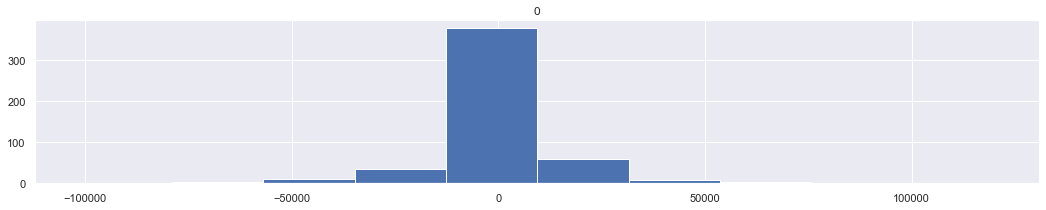

In [ ]:
# Histograms plot
residuals.hist()

### Residuals Q-Q Plot

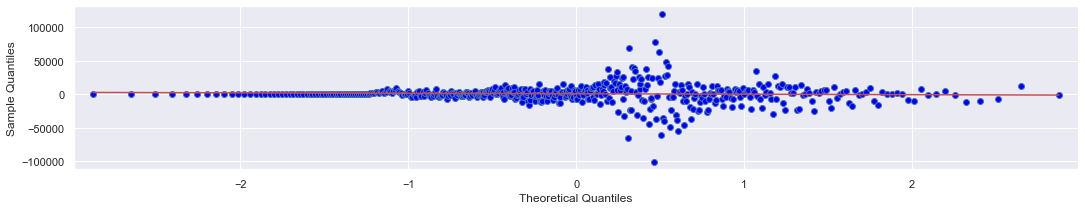

In [ ]:
# Q-Q plot
qqplot(residuals, line = 'r')
plt.show()

### Residuals Density Plot

<AxesSubplot:ylabel='Density'>

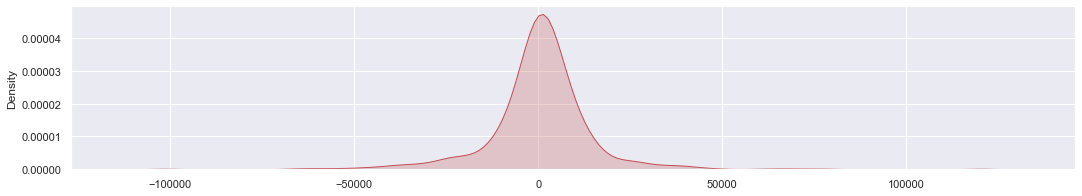

In [ ]:
# Density plot
plt.ticklabel_format(style = 'plain', useOffset = False)
sns.set(color_codes = True)
sns.kdeplot(np.hstack(residuals.values), shade = True, color = "r")

The residuals are normally distributed comparing to idealized Gaussian distribution.

Reference: \
(1) https://gitlab.com/matej_g/introduction-to-time-series-forecasting \
(2) https://www.statsmodels.org/stable/tsa.html